# Linear regression, multiple linear regression, another regressions!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("student-mat.csv",delimiter=';')

In [3]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


First: Determine if there is sufficient correlation between variaables, or with some variables

<ipython-input-4-66f3be860882>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))


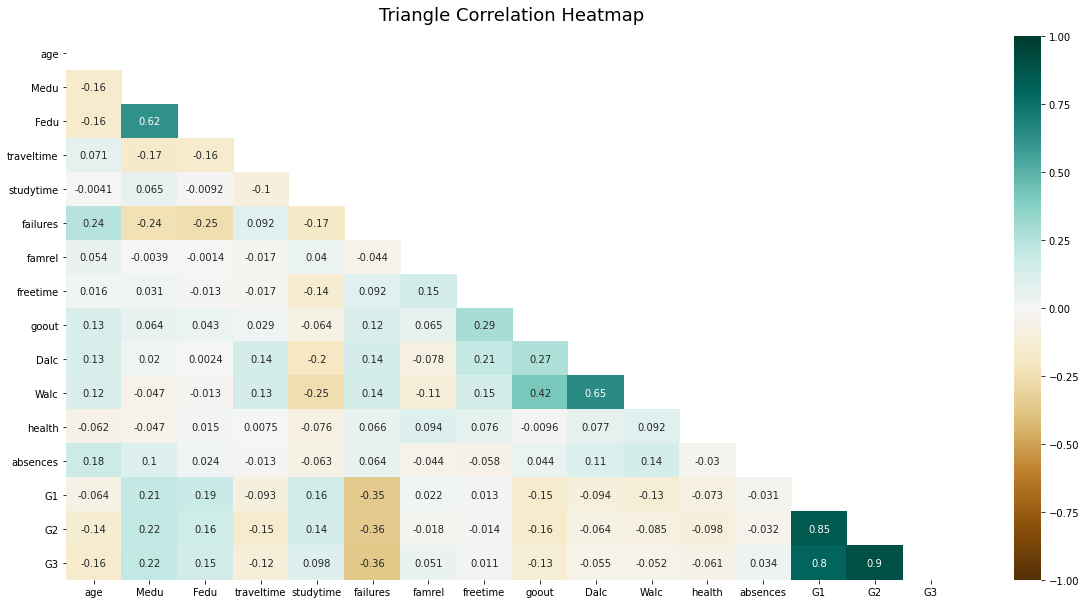

In [4]:
plt.figure(figsize=(20,10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

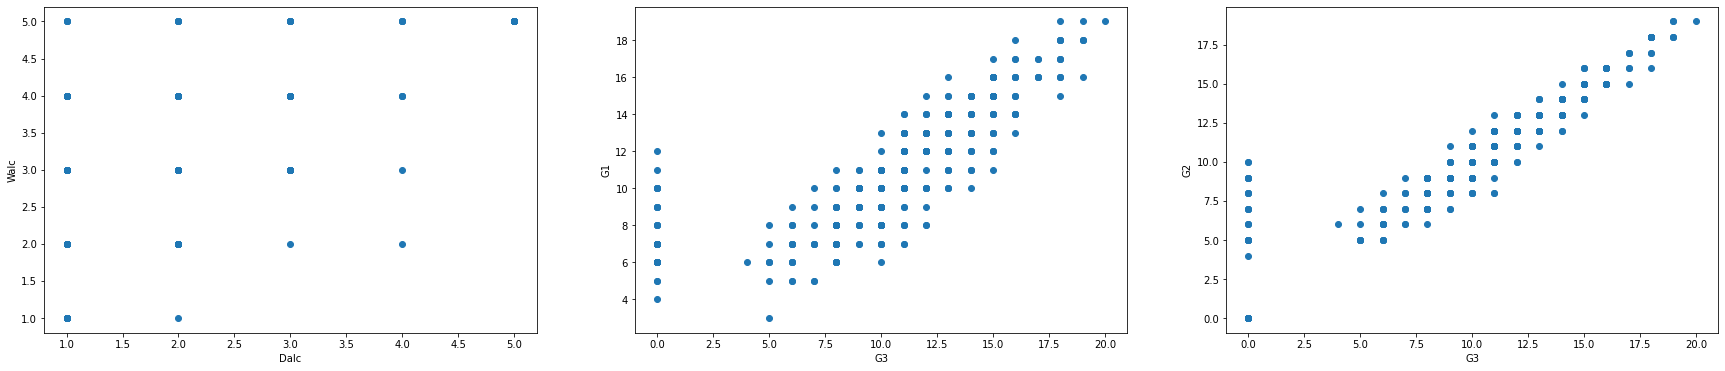

In [5]:
plt.figure(figsize=(30,6))
plt.subplot(131)
plt.scatter(data["Dalc"],data["Walc"])
plt.xlabel("Dalc")
plt.ylabel("Walc")
plt.subplot(132)
plt.scatter(data["G3"],data["G1"])
plt.xlabel("G3")
plt.ylabel("G1")
plt.subplot(133)
plt.scatter(data["G3"],data["G2"])
plt.xlabel("G3")
plt.ylabel("G2")
plt.show()

## Using Scipy

In [6]:
from scipy import optimize
import random

In [7]:
def f( x, p0, p1):
    return p0+p1*x

def ff(x, p):
    return f(x, *p)


### Using `optimize.leastsq`

In [8]:
def fit_leastsq(p0, datax, datay, function):

    errfunc = lambda p, x, y: function(x,p) - y

    pfit, pcov, infodict, errmsg, success = optimize.leastsq(errfunc, p0, args=(datax, datay), full_output=1, epsfcn=0.0001)

    if (len(datay) > len(p0)) and pcov is not None:
        s_sq = (errfunc(pfit, datax, datay)**2).sum()/(len(datay)-len(p0))
        pcov = pcov * s_sq
    else:
        pcov = np.inf

    error = [] 
    for i in range(len(pfit)):
        try:
            error.append(np.absolute(pcov[i][i])**0.5)
        except:
            error.append( 0.00 )
    pfit_leastsq = pfit
    perr_leastsq = np.array(error) 
    return pfit_leastsq, perr_leastsq 

# These are the true parameters
p0,p1 = 1.0, 1.0
# These are initial guesses for fits:
pstart = [p0+random.random(),p1+random.random()]
pfit, perr = fit_leastsq(pstart, data["G3"], data["G1"], ff)

print("\n# Fit parameters and parameter errors from lestsq method :")
print("pfit = ", pfit)
print("perr = ", perr)


# Fit parameters and parameter errors from lestsq method :
pfit =  [4.86125021 0.58065293]
perr =  [0.24862865 0.0218556 ]


### Using `optimize.curve_fit`

In [9]:
err_stdev = 0.2
def fit_curvefit(p0, datax, datay, function, yerr=err_stdev, **kwargs):
    """
    Note: As per the current documentation (Scipy V1.1.0), sigma (yerr) must be:
        None or M-length sequence or MxM array, optional
    Therefore, replace:
        err_stdev = 0.2
    With:
        err_stdev = [0.2 for item in xdata]
    Or similar, to create an M-length sequence for this example.
    """
    pfit, pcov = optimize.curve_fit(f,datax,datay,p0=p0, sigma=None, epsfcn=0.0001, **kwargs)
    error = [] 
    for i in range(len(pfit)):
        try:
            error.append(np.absolute(pcov[i][i])**0.5)
        except:
            error.append( 0.00 )
    pfit_curvefit = pfit
    perr_curvefit = np.array(error)
    return pfit_curvefit, perr_curvefit 

pfit, perr = fit_curvefit(pstart, data["G3"], data["G1"], ff)

print("\n# Fit parameters and parameter errors from curve_fit method :")
print("pfit = ", pfit)
print("perr = ", perr)


# Fit parameters and parameter errors from curve_fit method :
pfit =  [4.86125021 0.58065293]
perr =  [0.24862865 0.0218556 ]


### Using `bootstrap`

In [10]:
def fit_bootstrap(p0, datax, datay, function, yerr_systematic=0.0):

    errfunc = lambda p, x, y: function(x,p) - y

    # Fit first time
    pfit, perr = optimize.leastsq(errfunc, p0, args=(datax, datay), full_output=0)


    # Get the stdev of the residuals
    residuals = errfunc(pfit, datax, datay)
    sigma_res = np.std(residuals)

    sigma_err_total = np.sqrt(sigma_res**2 + yerr_systematic**2)

    # 100 random data sets are generated and fitted
    ps = []
    for i in range(100):

        randomDelta = np.random.normal(0., sigma_err_total, len(datay))
        randomdataY = datay + randomDelta
        randomfit, randomcov = optimize.leastsq(errfunc, p0, args=(datax, randomdataY), full_output=0)
        ps.append(randomfit) 

    ps = np.array(ps)
    mean_pfit = np.mean(ps,0)

    # You can choose the confidence interval that you want for your
    # parameter estimates: 
    Nsigma = 1. # 1sigma gets approximately the same as methods above
                # 1sigma corresponds to 68.3% confidence interval
                # 2sigma corresponds to 95.44% confidence interval
    err_pfit = Nsigma * np.std(ps,0) 

    pfit_bootstrap = mean_pfit
    perr_bootstrap = err_pfit
    return pfit_bootstrap, perr_bootstrap 

pfit, perr = fit_bootstrap(pstart, data["G3"], data["G1"], ff)

print("\n# Fit parameters and parameter errors from bootstrap method :")
print("pfit = ", pfit)
print("perr = ", perr)


# Fit parameters and parameter errors from bootstrap method :
pfit =  [4.86920188 0.58078583]
perr =  [0.26910651 0.02323181]


### Now let's some plot to get the evaluation

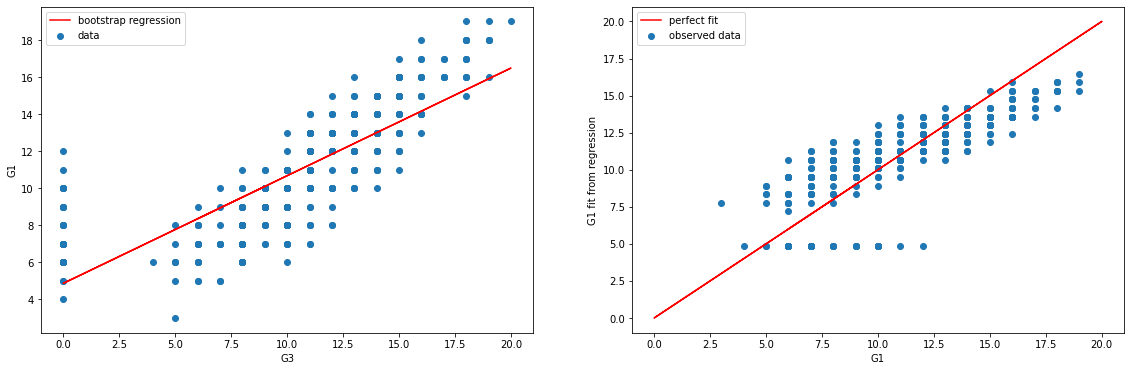

In [11]:
plt.figure(figsize=(30,6))
plt.subplot(131)
plt.scatter(data["G3"],data["G1"],label="data")
x0=data["G3"]#np.linspace(data["G3"].min(),data["G3"].max(),7)
plt.plot(x0,f(x0,*pfit),color="r",label="bootstrap regression")
plt.xlabel("G3")
plt.ylabel("G1")
plt.legend()
plt.subplot(132)
plt.scatter(data["G1"],f(x0,*pfit),label="observed data")
plt.plot(x0,x0,color="r",label="perfect fit")
plt.xlabel("G1")
plt.ylabel("G1 fit from regression")
plt.legend()
plt.show()

### Coefficient of Determination: Measuring the quality of a regression model

<img src="deter_coeff.png" alt="Drawing" style="width: 900px;"/>

In [12]:
from sklearn.metrics import r2_score
r2 = r2_score(data["G1"], f(x0,*pfit))
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.6423428811638234


In [13]:
def r2_hand(y,yhat):
    SST=np.sum((y-np.mean(y))**2)
    SSE=np.sum((y-yhat)**2)
    R2=(SST-SSE)/SST
    return R2

In [14]:
print('r2 score for perfect model is', r2_hand(data["G1"], f(x0,*pfit)))

r2 score for perfect model is 0.6423428811638235


### Yo have another option...

In [15]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor 

X = data['G3']   # independent variables
y = data['G1']   # dependent variables

# to get intercept -- this is optional
X = sm.add_constant(X)

# fit the regression model
reg = sm.OLS(y, X).fit()
reg.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     705.8
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           9.00e-90
Time:                        16:07:16   Log-Likelihood:                -830.80
No. Observations:                 395   AIC:                             1666.
Df Residuals:                     393   BIC:                             1674.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8613      0.249     19.552      0.000       4.372       5.350
G3             0.5807      0.022     26.568      0.000       0.538       0.624
==============================================================================
Omnibus:                        2.575   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.418
Skew:                           0.190   Prob(JB):                        0.299
Kurtosis:                       3.056   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Or inclusive take many more variables

In [16]:
X = data[['G3','G2',"Dalc","Walc"]]   # independent variables
y = data['G1']   # dependent variables

# to get intercept -- this is optional
X = sm.add_constant(X)

# fit the regression model
reg = sm.OLS(y, X).fit()
reg.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     269.9
Date:                Thu, 07 Apr 2022   Prob (F-statistic):          6.51e-111
Time:                        16:07:16   Log-Likelihood:                -771.87
No. Observations:                 395   AIC:                             1554.
Df Residuals:                     390   BIC:                             1574.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4308      0.328     10.451      0.000       2.785       4.076
G3             0.1272      0.045      2.858      0.004       0.040       0.215
G2             0.6073      0.054     11.181      0.000       0.501       0.714
Dalc          -0.0159      0.128     -0.125      0.901      -0.267       0.235
Walc          -0.1439      0.089     -1.625      0.105      -0.318       0.030
==============================================================================
Omnibus:                       61.111   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.548
Skew:                           0.696   Prob(JB):                     3.10e-41
Kurtosis:                       6.065   Cond. No.                         62.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Or use Machine Learning!

In [17]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [19]:
y_prediction =  LR.predict(x_test)
y_prediction

array([ 9.61563   , 11.82158272,  6.97067069, 10.16652213,  9.44843887,
       12.21729482, 16.26956382,  8.4922316 ,  8.0460393 , 12.94259691,
       14.18750774,  8.63535817, 13.35274668, 11.38978571, 13.355164  ,
        9.32937686,  8.77848473, 11.41143295, 13.90363881,  8.73525647,
       13.355164  , 14.45211363, 14.3306343 ,  7.94133947,  8.73525647,
       16.96358252, 11.13478286, 11.00366739, 15.57554513, 11.26830639,
        9.880269  ,  9.47730495, 14.04918269, 12.6611453 ,  8.50183464,
        6.94901418,  3.7772273 , 14.18750774, 12.2461609 ,  9.60361891,
        7.37601894, 11.27310791, 13.355164  ,  9.87785168, 14.04918269,
       10.71741426, 11.54734995, 13.35036248, 12.23173249, 14.19230926,
       12.79947034, 14.18750774, 11.12514671,  9.73710932,  7.24490346,
       12.37969369, 10.72221578,  7.63347221, 14.05398421, 15.024653  ,
       12.94259691,  9.73710932,  9.06232982,  6.97547221,  8.9216113 ,
       15.2916762 ,  9.74194395, 10.57908921, 10.57428769, 14.04

In [20]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 socre is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.8141278546057025
mean_sqrd_error is== 2.5413943135372854
root_mean_squared error of is== 1.594175120097314


In [21]:
y_prediction_all =  LR.predict(X)

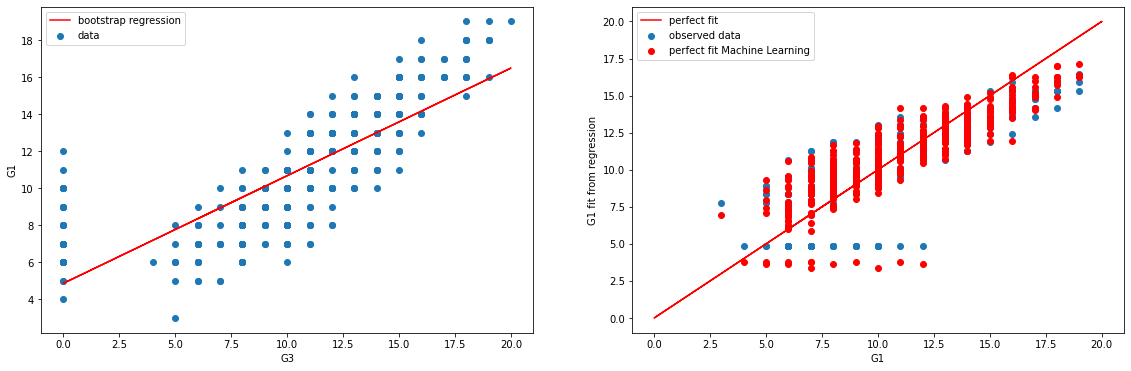

In [22]:
plt.figure(figsize=(30,6))
plt.subplot(131)
plt.scatter(data["G3"],data["G1"],label="data")
x0=data["G3"]#np.linspace(data["G3"].min(),data["G3"].max(),7)
plt.plot(x0,f(x0,*pfit),color="r",label="bootstrap regression")
plt.xlabel("G3")
plt.ylabel("G1")
plt.legend()
plt.subplot(132)
plt.scatter(data["G1"],f(x0,*pfit),label="observed data")
plt.plot(x0,x0,color="r",label="perfect fit")
plt.scatter(y,y_prediction_all,color="r",label="perfect fit Machine Learning")
plt.xlabel("G1")
plt.ylabel("G1 fit from regression")
plt.legend()
plt.show()

In [23]:
# predicting the accuracy score
score=r2_score(y,y_prediction_all)
print("r2 socre is ",score)
print("mean_sqrd_error is==",mean_squared_error(y,y_prediction_all))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y,y_prediction_all)))

r2 socre is  0.7319729149478409
mean_sqrd_error is== 2.9453930562222164
root_mean_squared error of is== 1.7162147465344237
